# Question Pairs

In [59]:
import numpy as np
import pandas as pd
import re
import sys
%matplotlib inline

In [4]:
sys.path.append('../..')

In [5]:
import keras_model.decomposable_attention as dec_attn

Using TensorFlow backend.


In [6]:
train_df, test_df = dec_attn.load_question_pairs_dataset()

In [10]:
train_df.head()

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [54]:
q1_lens = train_df.question1.apply(lambda x: len(re.split(r'\s+', x.strip()))).values
q2_lens = train_df.question2.apply(lambda x: len(re.split(r'\s+', x.strip()))).values
train_df = train_df.assign(q1_len=q1_lens, q2_len=q2_lens)
lens = np.vstack([q1_lens, q2_lens])

In [19]:
max_len = lens.max()
print('max_len:', max_len)

max_len: 228


In [38]:
max(q1_lens)

66

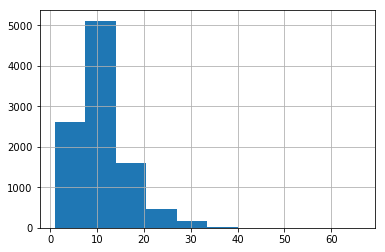

In [55]:
train_df.q1_len.hist()

In [39]:
max(q2_lens)

228

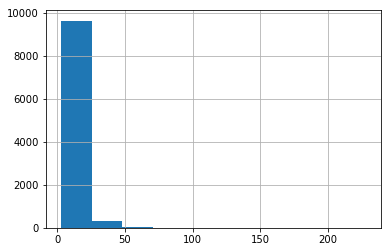

In [56]:
train_df.q2_len.hist()

In [66]:
bins = [5, 10, 20, 30, 40, 50, 60, 70, 100, 228]
train_df = train_df.assign(q1_binned=pd.cut(train_df.q1_len, bins), q2_binned=pd.cut(train_df.q2_len, bins))

In [65]:
train_df.groupby(train_df.q1_binned).size()

q1_binned
(5, 10]       5123
(10, 20]      3413
(20, 30]       589
(30, 40]        74
(40, 50]         6
(50, 60]         5
(60, 70]         1
(70, 100]        0
(100, 228]       0
dtype: int64

In [67]:
train_df.groupby(train_df.q2_binned).size()

q2_binned
(5, 10]       5204
(10, 20]      3184
(20, 30]       619
(30, 40]       111
(40, 50]        17
(50, 60]        18
(60, 70]         3
(70, 100]        0
(100, 228]       1
dtype: int64

In [63]:
train_df.head()

,qid1,qid2,question1,question2,is_duplicate,q1_encoded,q2_encoded,q1_lens,q2_lens,q1_len,q2_len,q1_binned
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14,12,14,12,"(10, 20]"
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,13,8,13,"(5, 10]"
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14,10,14,10,"(10, 20]"
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,9,11,9,"(10, 20]"
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,7,13,7,"(10, 20]"


In [9]:
embeddings, _, word2idx, _, _ = dec_attn.load_embeddings('../../keras_model/decomposable_attention/ft.vec')

In [20]:
train_df = dec_attn.preprocess(train_df, word2idx, max_len)

In [21]:
train_df.head()

,qid1,qid2,question1,question2,is_duplicate,q1_encoded,q2_encoded
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
train_df.iloc[0].question1

'What is the step by step guide to invest in share market in india?'

In [36]:
print(train_df.iloc[0].q1_encoded[-20:])

[0, 0, 0, 0, 0, 0, 4, 6, 3, 2021, 57, 2021, 3164, 7, 714, 10, 528, 688, 10, 642]
